In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('Data/breastCancer.csv')
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.shape

(699, 11)

## Data pre-processing

In [4]:
data.nunique()

id                   645
clump_thickness       10
size_uniformity       10
shape_uniformity      10
marginal_adhesion     10
epithelial_size       10
bare_nucleoli         11
bland_chromatin       10
normal_nucleoli       10
mitoses                9
class                  2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
data['bare_nucleoli'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [8]:
df = data.copy()
df['bare_nucleoli'].replace('?',np.nan,inplace = True)
df.fillna(df.median(), inplace = True)

In [9]:
df = df.astype(int, copy = False)

In [10]:
df.drop(columns = 'id', inplace = True)

In [11]:
df['class'].replace([2,4],['Benign','Malignant'],inplace = True)

## Exploratory Data Analysis

In [12]:
df.describe()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


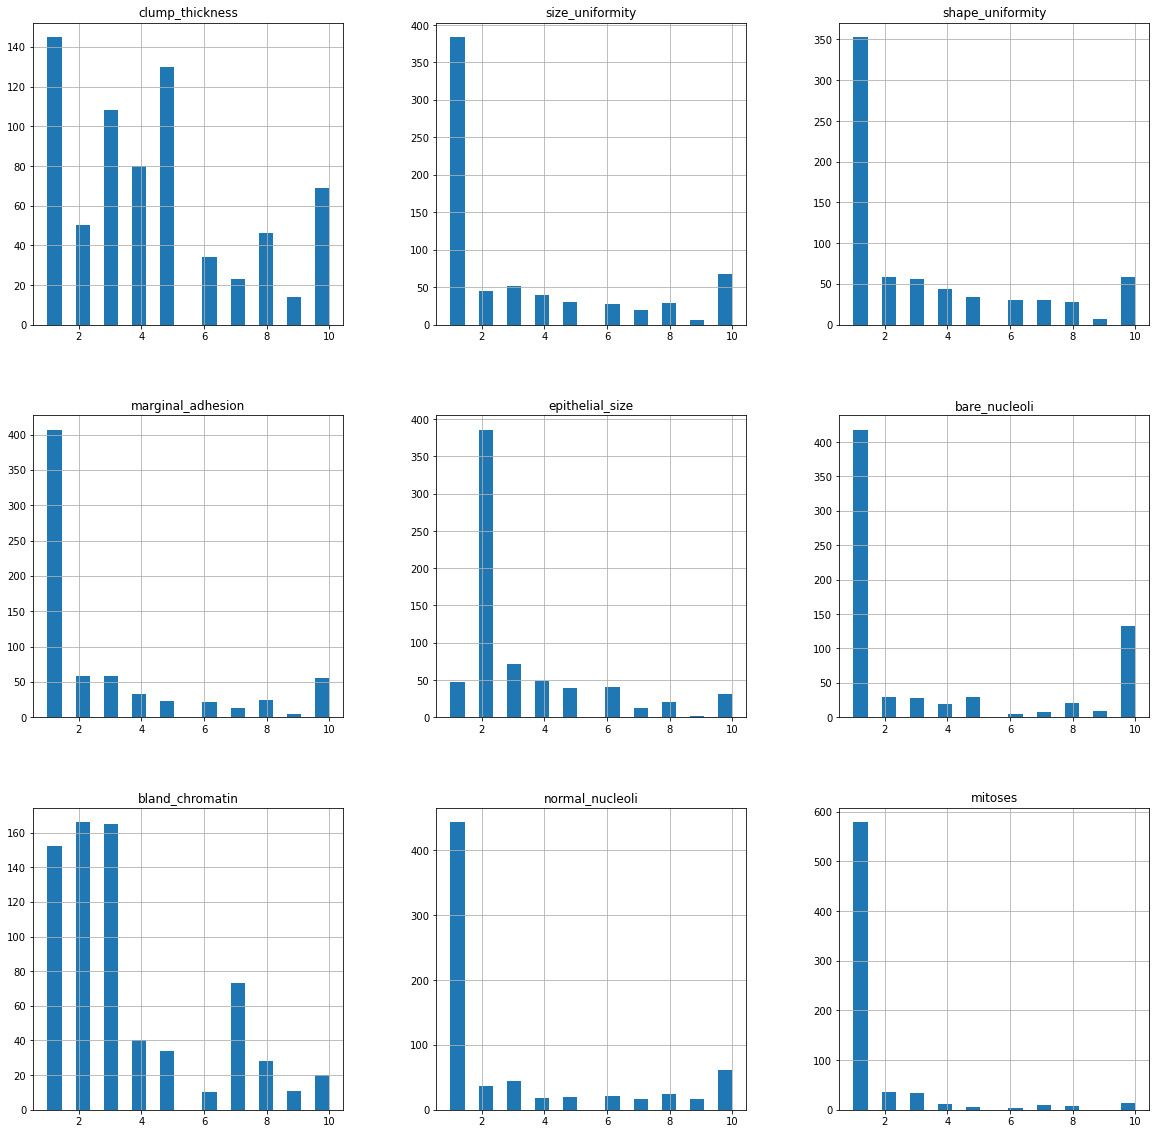

In [13]:
df.hist(bins = 20, figsize=(20,20));

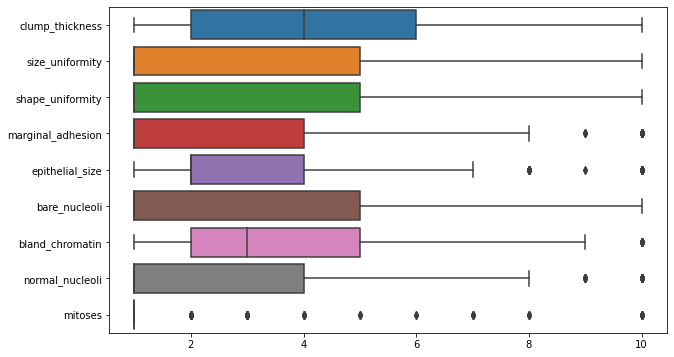

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, orient = 'h');

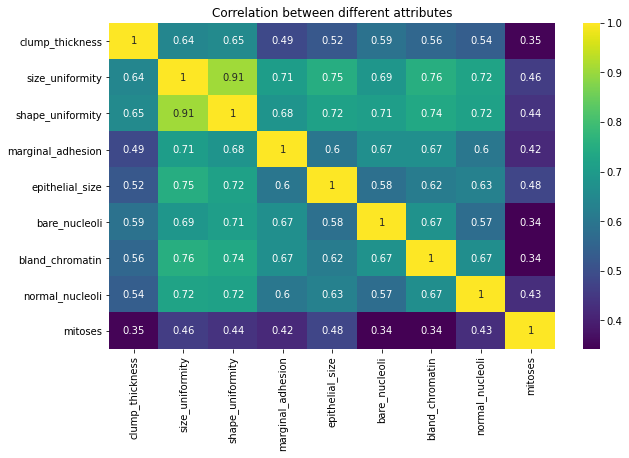

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,:-1].corr(), annot = True, cmap = 'viridis')
plt.title('Correlation between different attributes');

## Model Building

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### KNeighbours Classifier

In [18]:
KNN = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

In [19]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [20]:
ypred_knn = KNN.predict(X_test)

In [21]:
print('KNeighborsClassifier Algorithm is predicting at {:.2f}% accuracy'.format(KNN.score(X_test, y_test)*100))

KNeighborsClassifier Algorithm is predicting at 97.14% accuracy


In [22]:
# Classification report
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.98       137
   Malignant       0.99      0.93      0.96        73

    accuracy                           0.97       210
   macro avg       0.98      0.96      0.97       210
weighted avg       0.97      0.97      0.97       210



<AxesSubplot:>

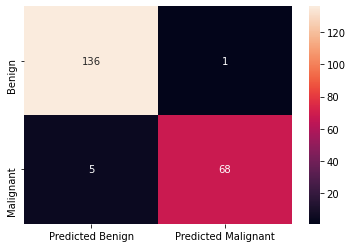

In [23]:
# Confustion matrix
cm = confusion_matrix(y_test,ypred_knn,labels=['Benign','Malignant'])
cm_ = pd.DataFrame(cm, index = [i for i in ['Benign','Malignant']], columns = ['Predicted Benign', 'Predicted Malignant'])
sns.heatmap(cm_,annot=True,fmt='d')

### SVC

In [24]:
svc = SVC(gamma=0.025,C=3)

In [25]:
svc.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [26]:
ypred_svc = svc.predict(X_test)

In [27]:
print('SVC Algorithm is predicting at {:.2f}% accuracy'.format(svc.score(X_test, y_test)*100))

SVC Algorithm is predicting at 98.10% accuracy


In [28]:
# Classification report
print(classification_report(y_test,ypred_svc))

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       137
   Malignant       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



<AxesSubplot:>

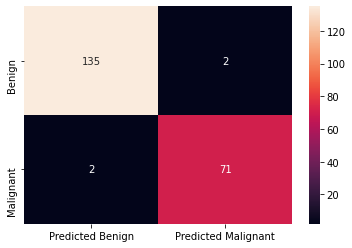

In [29]:
# Confustion matrix
cm = confusion_matrix(y_test,ypred_svc,labels=['Benign','Malignant'])
cm_ = pd.DataFrame(cm, index = [i for i in ['Benign','Malignant']], columns = ['Predicted Benign', 'Predicted Malignant'])
sns.heatmap(cm_,annot=True,fmt='d')